# Correlation, Regression, and Least Squares

Run the cell below to prepare the notebook.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Don't change this cell; just run it.
from client.api.notebook import Notebook
ok = Notebook('on_regression.ok')

Assignment: Homework 7: Correlation, Regression, and Least Squares
OK, version v1.14.15



## 1. Evaluating basketball game predictions


### A brief introduction to sports betting

In a basketball game, each team scores some number of points.  Conventionally,
the team playing at its own arena is called the "home team," and the other
team is called the "away team."  The winner is the team with the most points.

We can summarize what happened in a game by the "**outcome**", defined as
**the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored
by the home team}$$

If this number is positive, the away team won.  If it's negative, the home
team won.

Casinos in Las Vegas offer bets on the outcomes of National Basketball
Association (NBA) games.  One kind of bet works like this:

1. The casino decides on a number called the "spread."
2. You can bet 11 dollars that the outcome will be above the spread, or 11
   dollars that the outcome will be below the spread.
3. After the game, you end up with 21 dollars if you guessed correctly, and
   0 if you guessed incorrectly.

The analysts at the casino try to choose the "spread* value so that (according
to their analysis of the teams) there is a 50% chance that the outcome will be
below that value, and a 50% chance that the outcome will be above that value.

**The spread is the casino's best guess at the outcome (the away team's score
minus the home team's score).**

The table `spreads` contains spreads from the betting website
[Covers](http://www.covers.com) from every game in the 2014 NBA season, plus
actual game outcomes.

In [2]:
spreads = pd.read_csv("spreads.csv")
spreads.head()

,Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
0,4/10/2015,Utah,Memphis,88,89,1,2.5
1,3/10/2015,Utah,New York,87,82,-5,-13.0
2,11/19/2014,Indiana,Charlotte,88,86,-2,-2.0
3,11/15/2014,Chicago,Indiana,90,99,9,-9.0
4,3/25/2015,Utah,Portland,89,92,3,-2.0


Here's a scatter plot of the outcomes and spreads, with the spreads on the
horizontal axis.

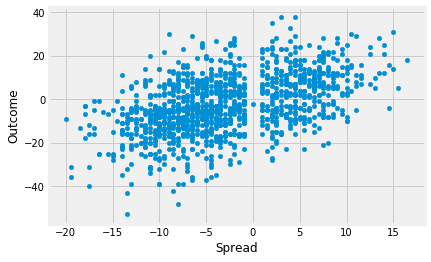

In [3]:
spreads.plot.scatter("Spread", "Outcome")

### Question 1

For reflection; why do you think that neither the spread and outcome are ever
0 (aside from a single case of the spread being 0)?

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In
other words, for every value of the spread, is the average outcome of games
assigned that spread equal to the spread? If not, the casino would apparently
be making a systematic error in its predictions.


### Question 2

Among games with a spread around 5, from 3.5 to 6.5 (including both 3.5 and
6.5), what was the average outcome?

*Hint:* Consider doing this by [combining Boolean arrays](https://matthew-brett.github.io/cfd2019/chapters/08/combining_boolean_arrays).

In [4]:
is_lt_5 = spreads['Spread'] >= 3.5
is_gt_5 = spreads['Spread'] <= 6.5
betweeners = np.logical_and(is_lt_5, is_gt_5)
spreads_around_5 = spreads[betweeners]
spread_5_outcome_average = np.mean(spreads_around_5['Outcome'])
print("Average outcome for spreads around 5:", spread_5_outcome_average)

Average outcome for spreads around 5: 4.9941176470588236


In [5]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3

If the average outcome for games with any given spread turned out to be
exactly equal to that spread, what would the slope and intercept of the linear
regression line be, in original units?

In [6]:
is_equal = spreads['Spread'] == spreads['Outcome']
equal_spread = spreads[is_equal]
outcome_equal = equal_spread['Outcome']
spread_equal = equal_spread['Spread']

from scipy.stats import linregress
linregress = linregress(spread_equal, outcome_equal)
print(linregress)

expected_slope_for_equal_spread = linregress.slope
expected_intercept_for_equal_spread = linregress.intercept

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=9.151730320765214e-248, stderr=0.0)


In [7]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4

Fix the `standard_units` function below.  It should take an array of numbers
as its argument and return an array of those numbers in standard units.

In [8]:
def standard_units(nums):
    """ Return array where every value in nums is converted to standard units.
    """
    return (nums - np.mean(nums)) / np.std(nums) 

In [9]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5

Compute the correlation between outcomes and spreads using the `standard_units` function.

In [10]:
spread = spreads['Spread']
outcome = spreads['Outcome']
spread_su = standard_units(spread)
outcome_su = standard_units(outcome)
spread_r = np.mean(spread_su * outcome_su)
spread_r

0.4918141368831422

In [11]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6a

In fact, you can use the correlation you have just calculated to give the
least-squares linear regression line that predicts outcomes from spreads, in
original units.

To do this, you need to:

* Divide the r value by the standard deviation of the original x values (here
  the Spread values), then
* Multiply the result by the standard deviation of the original y values (here
  the Outcome values).

Do that now to calculate the least-squares slope in original units.

In [12]:
spread_slope = (spread_r / np.std(spread)) * np.std(outcome) 
spread_slope

0.953926968226433

In [13]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

Confirm this is very close to the least-squares slope by using `minimize`.
Here are your [usual tools](https://matthew-brett.github.io/cfd2019/chapters/08/using_minimize):

In [14]:
from scipy.optimize import minimize

def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

Now use `minimize` to re-calculate the least-squares slope:

In [15]:
minimized_spread_slope = minimize(ss_any_line, [0, -0.5],
                                  args=(spread, outcome)).x[1]
minimized_spread_slope

0.9539269164155709

In [16]:
_ = ok.grade('q1_6b')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 7

For the "best fit" line that estimates the average outcome from the spread,
the slope is less than 1. Does knowing the slope alone tell you whether the
average spread was higher than the average outcome? If so, set the variable
name below to `True`. If you think you need more information than just the
slope of the regression line to answer that question, then respond `False`.
Briefly justify your answer below.

In [17]:
slope_implies_average_spread_above_average_outcome = False

*We need more information. The slope only tell us the relationship between 'x' and 'y', how 'y' changes with respect to 'x', but it does not tell us if the average of 'y' is higher than the average of 'x'.*

In [18]:
_ = ok.grade('q1_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Finding the Least Squares Regression Line

In this exercise, you'll work with a small invented data set.  Run the next
cell to generate the dataset `d` and see a scatter plot.

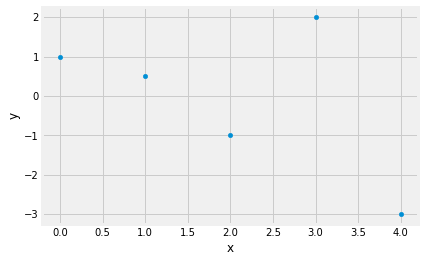

In [19]:
d = pd.DataFrame()
d['x'] = [0,  1,  2,  3,  4]
d['y'] = [1, .5, -1,  2, -3]
d.plot.scatter('x', 'y')

### Question 1 (Ungraded, but you'll need the result later)

Running the cell below will generate sliders that control the slope and
intercept of a line through the scatter plot.  When you adjust a slider, the
line will move.

By moving the line around, make your best guess at the least-squares
regression line.  (It's okay if your line isn't exactly right, as long as it's
reasonable.)

**Note:** Python will probably take about a second to redraw the plot each
time you adjust the slider.  We suggest clicking the place on the slider you
want to try and waiting for the plot to be drawn; dragging the slider handle
around will cause a long lag.

In [20]:
def plot_line(intercept, slope):
    plt.figure(figsize=(5,5))

    endpoints = np.array([-2, 7])
    p = plt.plot(endpoints, intercept + slope * endpoints,
                 color='orange',
                 label='Proposed line')

    plt.scatter(d['x'], d['y'], color='blue', label='Points')

    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line,
         intercept=widgets.FloatSlider(min=-4, max=4, step=.1),
         slope=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='intercept', max=4.0, min=-4.0), FloatSlider(value=0.…

<div class="hide">\pagebreak</div>

You can probably find a reasonable-looking line by just eyeballing it.  But
remember: the least-squares regression line minimizes the mean of the squared
errors made by the line for each point.  Your eye might not be able to judge
squared errors very well.


### A note on mean and total squared error

It is common to think of the least-squares line as the line with the least
*mean* squared error (or the square root of the mean squared error).

But that it doesn't matter whether you minimize the *mean* squared error or
the *total* squared error.  You'll get the same best line in either case.

That's because the total squared error is just the mean squared error
multiplied by the number of points (`len(d)`).  So if one line gets a better
total squared error than another line, then it also gets a better mean squared
error.  In particular, the line with the smallest total squared error is also
better than every other line in terms of mean squared error.  That makes it
the least squares line.

**Minimizing the total squared error minimizes the mean squared error as
well.**


### Question 2 (Ungraded, but you'll need the result later)

The next cell produces a more useful plot.  Use it to find a line that's
closer to the least-squares regression line, keeping the above note in mind.

In [21]:
def plot_line_and_errors(intercept, slope):
    plt.figure(figsize=(5,5))
    points = np.array([-2, 7])
    p = plt.plot(points, intercept + slope * points,
                 color='orange',
                 label='Proposed line')
    ax = p[0].axes

    predicted_ys = intercept + slope * d['x']
    diffs = predicted_ys - d['y']
    for i in np.arange(len(d)):
        x = d['x'].iloc[i]
        y = d['y'].iloc[i]
        diff = diffs.iloc[i]

        if diff > 0:
            bottom_left_x = x
            bottom_left_y = y
        else:
            bottom_left_x = x + diff
            bottom_left_y = y + diff

        ax.add_patch(patches.Rectangle(
            [bottom_left_x, bottom_left_y],
            abs(diff), abs(diff),
            color='red', alpha=.3,
            label=('Squared error' if i == 0 else None)))
        plt.plot([x, x], [y, y + diff], color='red', alpha=.6,
                 label=('Error' if i == 0 else None))

    plt.scatter(d['x'], d['y'], color='blue', label='Points')

    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line_and_errors,
         intercept=widgets.FloatSlider(min=-4, max=4, step=.1),
         slope=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='intercept', max=4.0, min=-4.0), FloatSlider(value=0.…

### Question 3

Describe the visual criterion you used to find a line in question 2.  (For
example, a possible (but incorrect) answer is, "I tried to make the red line
for the bottom-right point as small as possible.")

*We can say that the intercept of a line is the 'y-value' when 'x' is 0, and there is a point (0,~1) in the graph above that is not too far from the apparent 'line' formed by the rest of the points. For the slope, I tried to change its value to find a line that makes the errors (red lines) and squared errors (red squares) as small as possible on average.*

### Question 4

We can say that a point influences the line by how much the line would move if
the point were removed from the data set. Does the point at (3, 2) have more
or less influence than any other point on the location of the line?

*It has more influence than any other point. The point at (3, 2) is an outlier and as it is further away from the rest of the points it greatly affects the direction and steepness of the regression line.*

Now, let's have Python find this line for us.  When we use `minimize`, Python
goes through a process similar to the one you might have used in question 2.


### Question 5

Define a function called `total_squared_error`.  It should take two numbers as arguments:

1. the intercept of some potential line
2. the slope of some potential line

It should return the total squared error when we use that line to make
predictions for the dataset `d`.  You can use `d` inside the function -
remember, function world can see the variables in the notebook, it just can't
change what the variables in the notebook point to.

**Hint** - you can use the `ss_any_line` function above to make your life
easier.

In [22]:
x = d['x']
y = d['y']
def total_squared_error(intercept, slope):
    predicted_y = intercept + x * slope
    error = y - predicted_y
    return np.sum(error **2)

In [23]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6

What is the total squared error for the line you found by "eyeballing" the
errors in Question 1?  What about Question 2, where you made a guess that was
"aided" by a visualization of the squared error?  (It's okay if the error went
up, but for many students, the error will go down when using the visual aid.)

In [24]:
eyeballed_error = total_squared_error(1.4, -0.80)
aided_error = total_squared_error(1.2, -0.60)
print("Eyeballed error:", eyeballed_error)
print("Aided error:", aided_error)

Eyeballed error: 11.250000000000002
Aided error: 11.049999999999997


In [25]:
_ = ok.grade('q2_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 7

Use `minimize` to find the actual slope and intercept of the least-squares regression line.


In [26]:
minimized_slope = minimize(ss_any_line, [1, -0.5], args = (x, y))
#- The staff solution used 1 line of code above here.
intercept_from_minimize = minimized_slope.x[0]
slope_from_minimize = minimized_slope.x[1]
print("Least-squares regression line: predicted_y =",
      intercept_from_minimize,
      "+",
      slope_from_minimize,
      '* x')

Least-squares regression line: predicted_y = 1.1999999831746053 + -0.64999999533601 * x


In [27]:
_ = ok.grade('q2_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 8

What was the total squared error for that line?

In [28]:
best_total_squared_error = minimized_slope.fun
best_total_squared_error

10.975000000000003

In [29]:
_ = ok.grade('q2_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Finally, run the following cell to plot this "best fit" line and its errors:

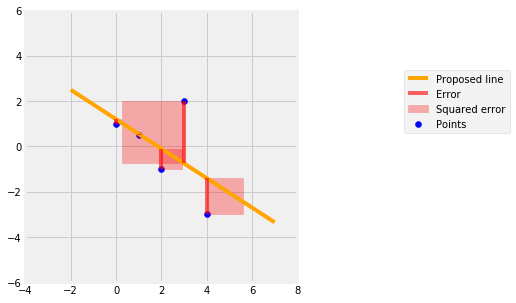

In [30]:
plot_line_and_errors(intercept_from_minimize, slope_from_minimize)

## 3. Triple Jump Distances vs. Vertical Jump Heights

Does skill in one sport imply skill in a related sport?  The answer might be
different for different activities.  Let us find out whether it's true for the
[triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump
similar to a long jump) and the vertical jump.  Since we're learning about
linear regression, we will look specifically for a *linear* association
between skill in the two sports.

The following data was collected by observing 40 college level soccer players.
Each athlete's distance in both jump activities was measured in centimeters.
Run the cell below to load the data.

In [31]:
# Run this cell to load the data
jumps = pd.read_csv('triple_vertical.csv')
jumps.head()

,triple,vertical
0,383.00,33.00
1,781.00,71.10
2,561.62,62.25
3,624.52,61.33
4,446.24,40.19


### Question 1

Before running a regression, it's important to see what the data look like,
because our eyes are good at picking out unusual patterns in data.  Draw a
scatter plot with the triple jump distances on the horizontal axis and the
vertical jump heights on vertical axis.

Use 

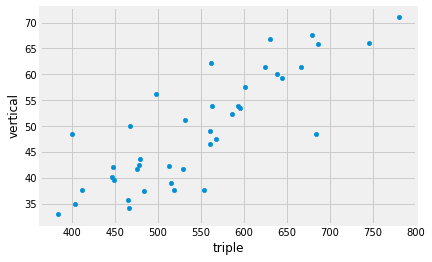

In [32]:
jumps.plot.scatter('triple', 'vertical')

**Question 2** If you were to calculate the *correlation coefficient* `r`, do
you think it would be closer to 0, .5, or -.5? Explain.

*It would be closer to 0.5 because the scatter plot shows that when the horizontal axis increases, the vertical axis also increases. Therefore, there is a positive correlation between the two variables.* 

### Question 3

Create a function called `regression_parameters`. It takes as its argument a
table with two columns.  The first column is the x-axis, and the second column
is the y-axis.  It should compute the intercept and slope of the regression
line that predicts the second column from the first, in original units
(centimeters).  It should return an array with two elements: the intercept of
the regression line, and the slope of the regression line.

In [33]:
def regression_parameters(t):
    minimized_t = minimize(ss_any_line, [1, 0.5], args = (t.iloc[:, 0], t.iloc[:, 1]))
    #- Our solution had 1 line above this one
    intercept = minimized_t.x[0]
    slope = minimized_t.x[1]
    return np.array([intercept, slope])

# When your function is finished, the next lines should
# compute the regression line predicting vertical jump
# distances from triple jump distances.
parameters = regression_parameters(jumps)
print('Intercept:', parameters[0])
print('Slope:', parameters[1])

Intercept: -1.5665115305153579
Slope: 0.09295726058787437


In [34]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4

Let's use `regression_parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan
Edwards. What's our prediction for what Edwards' vertical jump would be?

In [35]:
triple_record_vert_est = regression_parameters(jumps)[0] + 1829 * regression_parameters(jumps)[1]
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452318 centimeters


In [36]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5

Do you expect this estimate to be accurate within a few centimeters? Why or
why not?

In [37]:
from scipy.stats import linregress
linregress_vertical_by_triple = linregress(jumps['triple'], jumps['vertical'])
linregress_vertical_by_triple

LinregressResult(slope=0.09295728160512183, intercept=-1.5665209729634668, rvalue=0.8343076972837596, pvalue=2.269638858018966e-11, stderr=0.009964433825057805)

*Yes, because there is a strong significant correlation between the vertical and triple jump values (0.8343, p-value = 0). Therefore, the best fit regression line calculated will allow us to predict accurately the vertical jump value corresponding to any given triple jump value. However, it is worth mentioning that the triple jump record is quite far from the points with which the regression line was calculated. For a more accurate result it would be preferable to have more data in between and recalculate the regression line.*

## 4. Testing Relationship Ratings

Throughout this part of the homework, we will be interested in learning how
different factors can contribute to the rating couples give their
relationship, on a scale of 1-5 (1 being most satisfied, and 5 being the
least).

To do this, we will be looking at the table that is loaded below.

**Note:** The data in this table is quite dated; for example, it only includes
heterosexual relationships. A better dataset would contain a more accurate
sample of couples. When drawing conclusions from data, it is important to be
aware of biases that exist in the dataset.

In [38]:
couples = pd.read_csv('couples.csv')
couples.head()

,ID,Gender,Marital Status,Relationship Rating,Age,Education,Household Income,Employment Status
0,0,male,married,1,51,Bachelor's degree,"75,000 to 84,999",working as paid employee
1,0,female,married,1,53,High school graduate - diploma or the equivale...,"75,000 to 84,999",working as paid employee
2,1,male,married,1,57,Associate degree,"85,000 to 99,999",working as paid employee
3,1,female,married,1,57,High school graduate - diploma or the equivale...,"85,000 to 99,999",working as paid employee
4,2,male,married,1,60,Bachelor's degree,"75,000 to 84,999",working as paid employee


Looking at the table above, we note that we should be able to test whether
different factors can affect the relationship rating, from age to education.
To begin, we are first going to investigate whether *marital status* has an
effect on relationship rating. In order to accomplish this, we are going to do
a permutation test!


### Question 1

State the *null hypothesis* for such a test (assume we aren't trying to figure
out ***how*** marital status affects relationship rating, just whether or not
it does).

Remember the *null hypothesis* is a specification of the ideal world in which
there is *not any* effect.

**Answer:**

Null hypothesis: There is no significant association between marital status and relationship rating. 


### Question 2

Before we continue, we will have to talk about the notion of a contingency
table.

Define `contingency` to be a data frame where the rows represent unique values
of the relationship ratings, the columns represent the unique values of
marital status present in the table, and the values in each cell represent the
number of individuals with a given marital status and relationship rating.

**Hint** use the Pandas `crosstab` function.

In [39]:
contingency = pd.crosstab(couples['Relationship Rating'], couples['Marital Status'])
contingency

Marital Status,married,partner
Relationship Rating,,
1,1023,290
2,373,229
3,39,26
4,35,30
5,14,7


In [40]:
_ = ok.grade('q4_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3

It is difficult to identify a pattern in the above table, since our table has
so many more married people than it does unmarried. To rectify this, we will
instead compute proportions.

Assign `contingency_prop` to a table with the same columns and rows, but the
values are instead in proportions, i.e. the value in the cell corresponding to
a relationship rating of 1 and marital status of "married" should be the
proportion of married people who gave their relationship a 1.  In other words,
replace the values by the proportion of all counts in the matching *column*.

In [41]:
contingency_prop = pd.crosstab(couples['Relationship Rating'], couples['Marital Status'], normalize = 'columns')
contingency_prop

Marital Status,married,partner
Relationship Rating,,
1,0.689353,0.498282
2,0.251348,0.393471
3,0.026280,0.044674
4,0.023585,0.051546
5,0.009434,0.012027


In [42]:
_ = ok.grade('q4_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Question 4

The `married` column of `contingency_prop` now contains proportions of married
people who gave ratings 1, 2, 3, 4, 5, and the `partner` column has the
equivalent proportions for the not-married people.

We would like to have some measure of the difference `married` and `partner` proportions.

One way of doing this is called *Total Variation Distance* (TVD).

It works like this: for each of the five proportions we subtract the `partner`
proportion from the `married` proportion, and then knock of any minus signs by
taking the absolute value.   We end up with five absolute differences of
proportions.  The TVD is the sum of these five absolute differences divided by
two.

Assign `tvd_marriages` to the Total Variation Distance between the
distributions of married people's relationship ratings and unmarried people's
relationship ratings.

In [43]:
tvd_marriages = np.sum(np.abs(contingency_prop['married'] - contingency_prop['partner'])) / 2
tvd_marriages

0.19107131278887746

In [44]:
_ = ok.grade('q4_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5

Let's get more general now. Define the function `tvd` which takes in:

- any table like `couples`
- `conditions`: the name of a column like Relationship Rating
- `values`: the name of a column like Marital Status

The function should return the total variation distance between the
distribution of conditions in the first unique value of `values` and the
distribution of conditions in the second unique value of `values` (assume
there are only two unique values)

***Hint***: This looks daunting, but you are just generalizing the code you
have written in the cells above.

In [45]:
def tvd(t, conditions, values):
    crosstab_prop = pd.crosstab(t[conditions], t[values], normalize = 'columns')
    abs_diff = np.abs(crosstab_prop.iloc[:,0] - crosstab_prop.iloc[:,1]) 
    return np.sum(abs_diff) / 2

# This should give the same answer as the cell above.
tvd(couples, 'Relationship Rating', 'Marital Status')

0.19107131278887746

In [46]:
_ = ok.grade('q4_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6

Now that we have a valid test statistic, fill in the implementation of
`permutation_test` below. It should run a permutation test to check whether
conditions and values are related, where conditions and values are defined as
above.

**Hint** by saying conditions are and values are not related, we are saying
that the pairing between conditions is random.

The inputs to the function are:

- `t`: a table containing our data
- `conditions`: the name of the column in `t` representing our conditions
- `values`: the name of the column in `t` representing our values
- `repetitions`: the number of permutations we'd like to test.
- `statistic`: a test statistic function (such as `tvd`).

The return value should be the p-value of seeing the observed value assuming
the null hypothesis. Fill in the implementation as necessary; we have also
provided code which allows you to see an empirical histogram of the
distribution under the null.

0.0

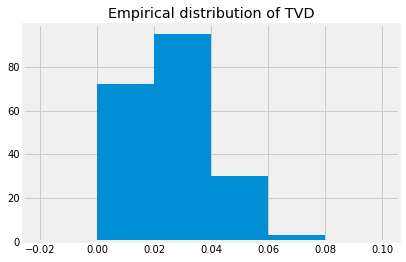

In [47]:
def permutation_test(t, conditions, values, repetitions, statistic):
    observed_stat = statistic(t, conditions, values)
    fake_stats = np.zeros(repetitions)
    # Values as an array, for shuffling.
    to_shuffle = np.array(t[values])

    for i in np.arange(repetitions):
        # Shuffle the values
        np.random.shuffle(to_shuffle)
        shuffled_df = t.copy()
        shuffled_df[values] = to_shuffle
        fake_stats[i] = statistic(shuffled_df, conditions, values)
    
    p_value = np.count_nonzero(fake_stats >= observed_stat) / repetitions
    # Show the sampling distribution
    plt.hist(fake_stats, bins=np.arange(-.02, .12, .02))
    plt.title('Empirical distribution of TVD')
    return p_value

permutation_test(couples, 'Relationship Rating', 'Marital Status', 200, tvd)

### Question 7

Based on the above method, should we reject the null hypothesis that the relationship ratings and marital status are uncorrelated, or should we fail to reject? Why?


*We should reject the null hypothesis because the probability of finding a TVD = 0.19 (the TVD observed in the 'couples' data frame) in a random distribution (shuffled data frame) is 0. Therefore, the TVD value (0.19) is due to a statistically significant association between marital status and relationship ratings* 

## Done

You're finished with the assignment!  Be sure to...

- **run all the tests** (the next cell has a shortcut for that),
- **Save and Checkpoint** from the "File" menu.
- Finally, **restart** the kernel for this notebook, and **run all the
  cells**, to check that the notebook still works without errors.  Use the
  "Kernel" menu, and choose "Restart and run all".  If you find any problems,
  go back and fix them, save the notebook, and restart / run all again, before
  submitting.  When you do this, you make sure that we, your humble markers,
  will be able to mark your notebook.

In [48]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------